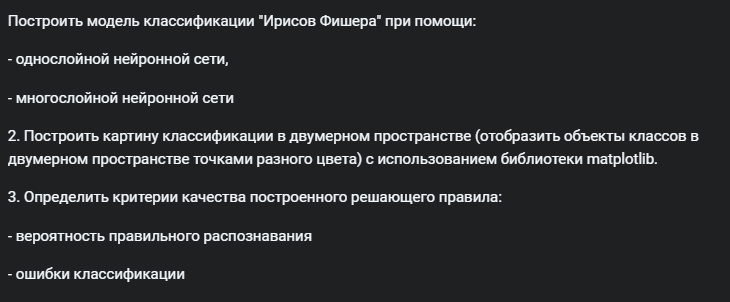

# Prepare

In [153]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=columns)


dataset.drop(dataset[dataset[columns[4]] == "Iris-setosa"].index, inplace=True)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

X = dataset.copy()
y = X.pop('class')

y = y.map(
        {'Iris-versicolor':0, 'Iris-virginica': 1}
    )

transformer_num = make_pipeline(
    StandardScaler(),
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)


X_train = transformer_num.fit_transform(X_train)
X_valid = transformer_num.transform(X_valid)

# SingleL

Epoch 1/1000
3/3 [==============================] - 1s 90ms/step - loss: 0.5576 - binary_accuracy: 0.7333 - val_loss: 0.5267 - val_binary_accuracy: 0.7600
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5584 - binary_accuracy: 0.7867 - val_loss: 0.5210 - val_binary_accuracy: 0.7600
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5502 - binary_accuracy: 0.7333 - val_loss: 0.5161 - val_binary_accuracy: 0.7600
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.5477 - binary_accuracy: 0.7867 - val_loss: 0.5108 - val_binary_accuracy: 0.7600
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5425 - binary_accuracy: 0.7867 - val_loss: 0.5053 - val_binary_accuracy: 0.7600
Epoch 6/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.5395 - binary_accuracy: 0.7733 - val_loss: 0.4999 - val_binary_accuracy: 0.7600
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - los

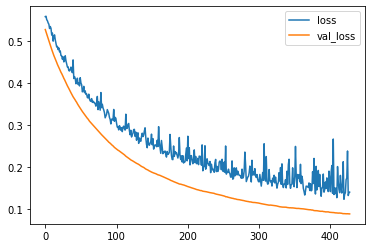

In [155]:
from tensorflow import keras
from keras import layers
from tensorflow import metrics


model_sigleL = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=1,input_shape=[X_train.shape[1]],activation='sigmoid'),
])

model_sigleL.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        keras.metrics.BinaryAccuracy()
        ]
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model_sigleL.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=1000,
    callbacks=[early_stopping],
)

history_ds=pd.DataFrame(history.history)
history_ds.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_ds['val_loss'].min()))

# MultyL

Epoch 1/1000
3/3 [==============================] - 1s 82ms/step - loss: 0.5229 - binary_accuracy: 0.7600 - val_loss: 0.4616 - val_binary_accuracy: 0.8400
Epoch 2/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.4965 - binary_accuracy: 0.8133 - val_loss: 0.4598 - val_binary_accuracy: 0.8400
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.4891 - binary_accuracy: 0.8267 - val_loss: 0.4578 - val_binary_accuracy: 0.8400
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.4910 - binary_accuracy: 0.8533 - val_loss: 0.4556 - val_binary_accuracy: 0.8400
Epoch 5/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.4942 - binary_accuracy: 0.8133 - val_loss: 0.4534 - val_binary_accuracy: 0.8400
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5185 - binary_accuracy: 0.8133 - val_loss: 0.4509 - val_binary_accuracy: 0.8400
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - los

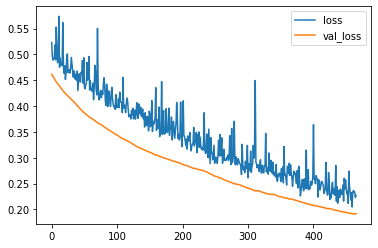

In [156]:
from tensorflow import keras
from keras import layers
from tensorflow import metrics


model_multyL = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=2,input_shape=[X_train.shape[1]],activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model_multyL.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        keras.metrics.BinaryAccuracy()
        ]
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model_multyL.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=1000,
    callbacks=[early_stopping],
)
history_ds=pd.DataFrame(history.history)
history_ds.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_ds['val_loss'].min()))

# График

In [157]:
import matplotlib.pyplot as plt
import numpy as np


def normalize(dta):
  _tmp = []
  for j in [dta.shape[1]]:
      if dta[j] >= 0.5:
        _tmp.append(1)
      if dta[j] < 0.5:
        _tmp.append(0)
  return _tmp

groups = np.unique(dataset['class'])
colors = ['red','blue']

pres_normalized=[normalize(model_multyL.predict(X_valid)), normalize(model_sigleL.predict(X_valid))]

1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 19ms/step


(4.75, 8.05, 1.91, 3.8899999999999997)

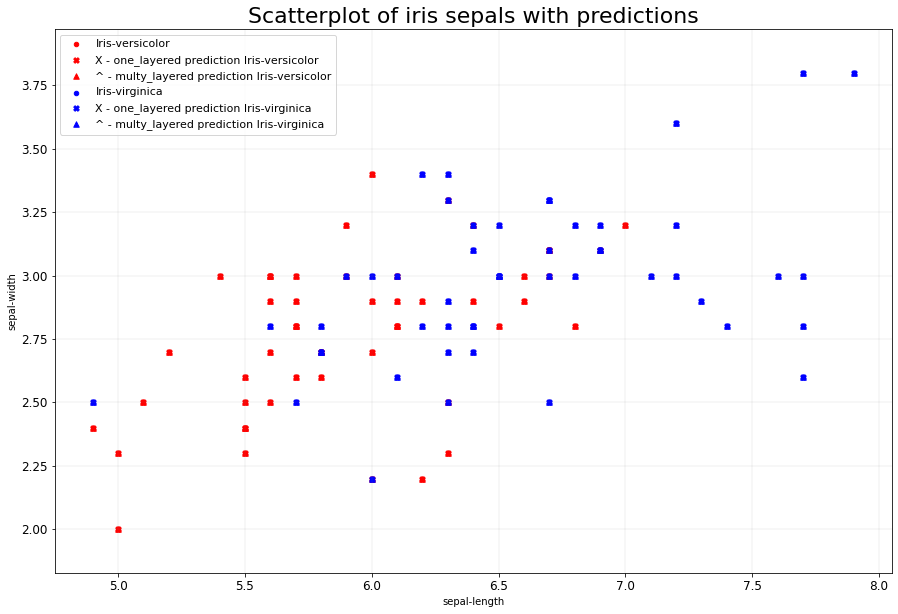

In [158]:
_, ax = plt.subplots(figsize=(15,10))

_tmp = pd.DataFrame(X_valid)
df=pd.DataFrame(data={
    'Valid_x':_tmp[0],
    'Valid_y':_tmp[1],
    'singleL_pre':model_sigleL.predict(X_valid).flatten(),
    'multyL_pre':model_multyL.predict(X_valid).flatten() 
    })



for i, group in enumerate(groups):
    group_data: pd.DataFrame = dataset.loc[dataset["class"] == group, :]

    ax.scatter(
        dataset.columns[0],
        dataset.columns[1],
        data=group_data,
        s=20, c=colors[i], label=str(group)
    )

    group_data: pd.DataFrame = dataset.loc[dataset["class"] == group, :]
    ax.scatter(
        group_data['sepal-length'],
        group_data['sepal-width'],
        s=30, c=colors[i], label="X - one_layered prediction "+str(group),
        marker='X'
    )

    ax.scatter(
        group_data['sepal-length'],
        group_data['sepal-width'],
        s=30, c=colors[i], label="^ - multy_layered prediction "+str(group),
        marker='^'
    )

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.gca().set(xlim=(0, 7), ylim=(0, 3), xlabel=dataset.columns[0], ylabel=dataset.columns[1])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Scatterplot of iris sepals with predictions", fontsize=22)
plt.legend(fontsize=11)
plt.axis("equal")

In [159]:
_tmp = pd.DataFrame(X_valid)
df=pd.DataFrame(data={'Valid_x':_tmp[0],'Valid_y':_tmp[1],'singleL_pre':model_sigleL.predict(X_valid).flatten(),'multyL_pre':model_multyL.predict(X_valid).flatten() })

df.head()

1/1 [==============================] - 0s 19ms/step


,Valid_x,Valid_y,singleL_pre,multyL_pre
0,0.661723,-1.100114,0.948184,0.988338
1,0.360940,0.352501,0.993612,0.999544
2,-1.594150,-0.519068,0.039973,0.257940
3,1.112897,0.933548,0.055403,0.257940
4,0.210548,0.933548,0.090091,0.257940
